In [56]:
!pip install kneed

  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata


In [59]:
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, AgglomerativeClustering, DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator
import numpy as np
from sklearn.neighbors import NearestNeighbors

In [2]:
s1 = np.array([ list(map(int, i.split())) for i in open('s1.txt')])
print(*s1[:10])
x = [row[0] for row in s1] 
y = [row[1] for row in s1] 

[664159 550946] [665845 557965] [597173 575538] [618600 551446] [635690 608046] [588100 557588] [582015 546191] [604678 574577] [572029 518313] [604737 574591]


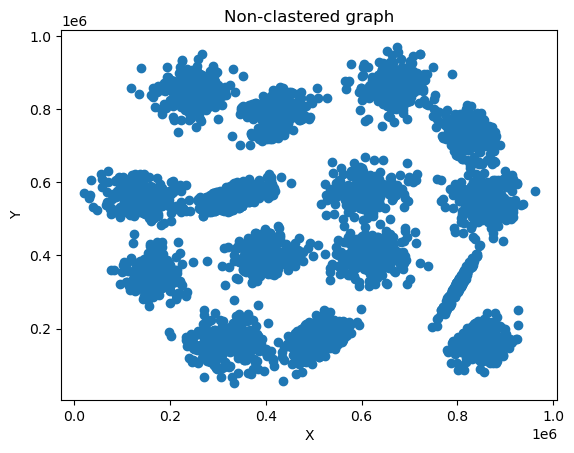

In [53]:
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Non-clastered graph')
plt.show()

/Users/arinafedotova/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


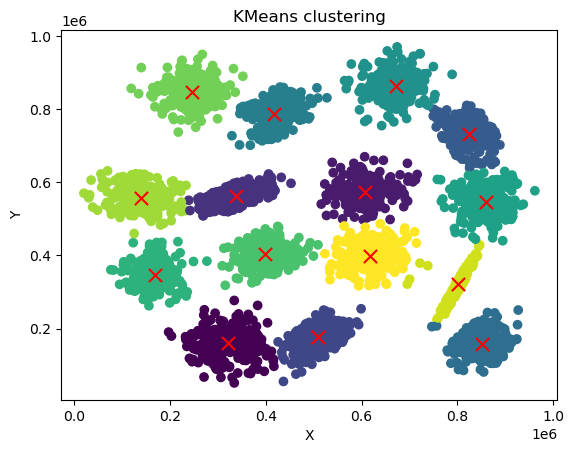

In [14]:
kmeans = KMeans(n_clusters = 15, init = 'k-means++').fit(s1)

plt.scatter(x, y, c=kmeans.labels_)

centers = kmeans.cluster_centers_
plt.scatter([i[0] for i in centers], [i[1] for i in centers], c='red', s=90, marker = 'x')

plt.title('KMeans clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Его основная идея - найти центры кластеров (центроиды), вокруг которых образовываются кластеры. Центроиды в данном алгоритме по сути выполняют роль центров масс для остальных точек из кластера  
Можно указать количество центроидов  
Хорошо работает с большим количеством данных  
Подходит для шарообразных скоплений  

/Users/arinafedotova/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:142: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


1390


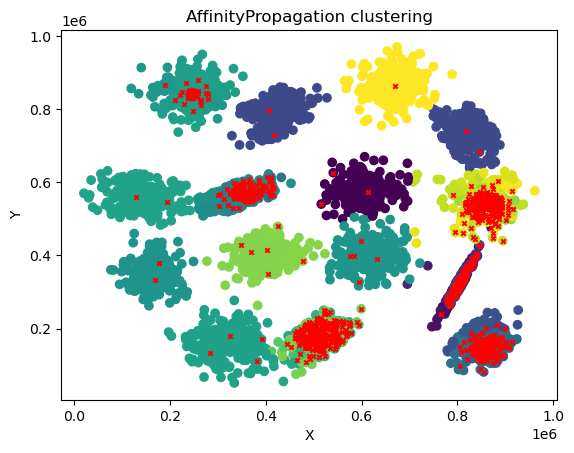

In [27]:
affprop = AffinityPropagation().fit(s1)
plt.scatter(x, y, c=affprop.labels_)

centers = affprop.cluster_centers_
n_clusters_ = len(centers) 
print(n_clusters_)

plt.title('AffinityPropagation clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Распространения близости  

Создает кластеры, отправляя сообщения между парами образцов до схождения. Затем набор данных описывается с использованием небольшого количества образцов, которые определяются как наиболее репрезентативные для других образцов. Сообщения, отправляемые между парами, представляют пригодность одного образца быть образцом другого, который обновляется в ответ на значения из других пар. Это обновление происходит итеративно до сходимости, после чего выбираются окончательные образцы и, следовательно, дается окончательная кластеризация.  
Этот алгоритм особенно полезен, когда у вас нет заранее известного числа кластеров или когда хотите найти скрытые группы в данных.  
Находит "экземпляры" - элементы из входного набора данных, являющиеся представителями кластеров.  
Требует больший объем памяти, для работы

Пусть S - матрица, с подсчитанным значениями сходства между двумя точками. Диагональные элементы матрицы будут представлять вероятность того, что этот объект сможет стать экземпляром.
В ходе работ алгоритма выполняются два шага, на которых обновляются матрицы:
1) матрица ответственности R со значениями, показывающимим, насколько хорошо объект, подоходит для того, чтобы стать экземпляром для другого, относительно других кандидатов в экземпляры
2) матрица доступности A со значениями, показывающими, насколько уместно для одного объекта выбрать другой в качестве экземпляра

В итоге экземплярами становятся те объекты, для которых сумма элементов двух матриц > 0


17


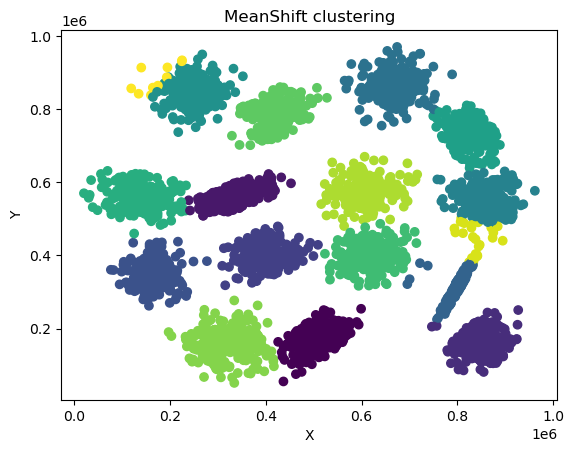

In [66]:
meanshift = MeanShift(bandwidth = 51043).fit(s1)

plt.scatter(x, y, c=meanshift.labels_)
n_clusters_ = len(meanshift.cluster_centers_ ) 
print(n_clusters_)

plt.title('MeanShift clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Средний сдвиг - алгоритм, который работает, обновляя кандидатов в центроиды, чтобы они были средними точками в данном регионе. Затем эти кандидаты фильтруются на этапе постобработки, чтобы исключить почти дубликаты и сформировать окончательный набор центроидов.  
Алгоритм автоматически устанавливает количество кластеров  
Параметр bandwidth определяет размер области для поиска. 
Алгоритм не отличается высокой масштабируемостью, так как он требует многократного поиска ближайшего соседа во время выполнения алгоритма.  


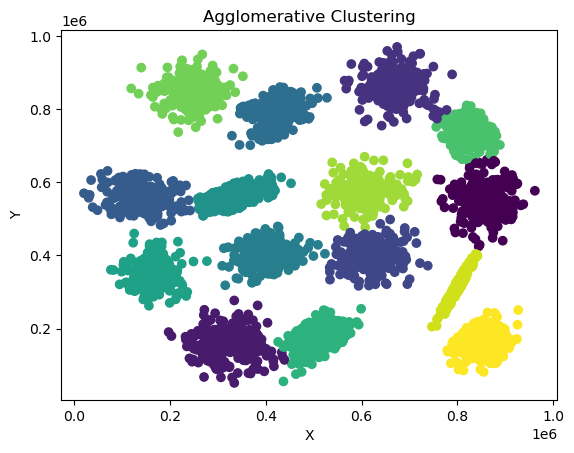

In [45]:
agglo = AgglomerativeClustering(n_clusters = 15).fit(s1)

plt.scatter(x, y, c=agglo.labels_)

plt.title('Agglomerative Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Использует идею объединения(агломерация - объединение или слияние) близких объектов для формирования кластеров. Он начинает с каждого объекта как отдельного кластера и последовательно объединяет их на основе определенных условий.  
Основан на подходе «снизу вверх», где каждый объект начинает как отдельный кластер и затем объединяется с наиболее близким кластером на каждой итерации. Близость между кластерами измеряется с помощью некоторой метрики, которая учитывает сходство объектов внутри каждого кластера.  
Результат иерархической кластеризации может быть представлен с помощью дендрограммы.  
Иерархическая кластеризация хуже подходит для кластеризации больших объемов данных  

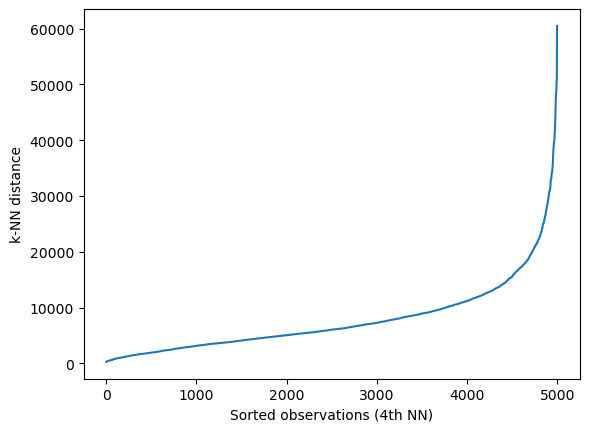

In [61]:
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors = 5).fit(s1)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(s1)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

51043.01489920046


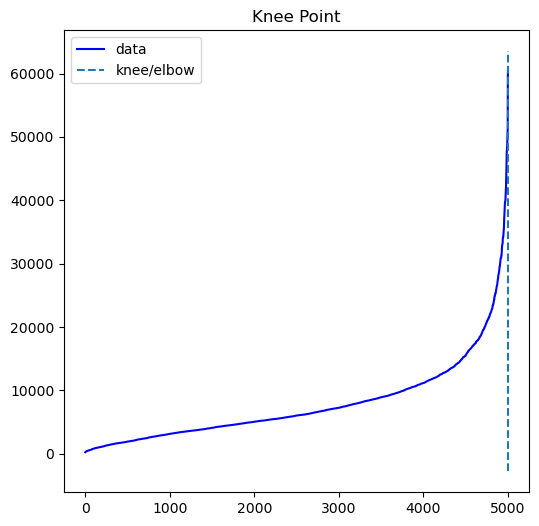

In [62]:
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)
kneedle.plot_knee()
plt.show()

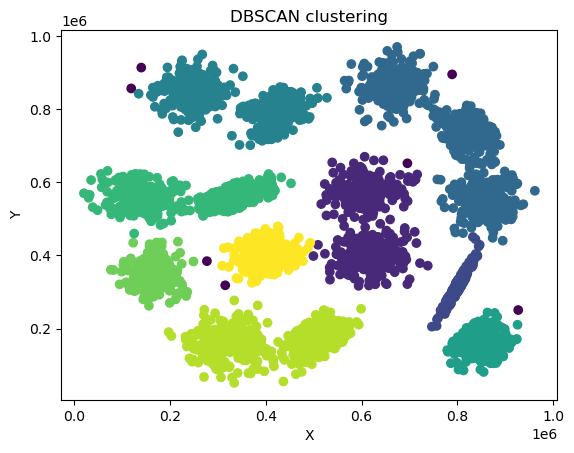

In [65]:
dbscan = DBSCAN(eps = 51043, min_samples = 30).fit(s1)

plt.scatter(x, y, c=dbscan.labels_)


plt.title('DBSCAN clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

(Density-Based Spatial Clustering of Applications with Noise, плотностной алгоритм пространственной кластеризации с присутствием шума)  
Точки делятся на три вида: основные точки, достижимые по плотности точки, выпадающие(шум)  
Точка р являетс основной, если по меньшей мере N (некоторое заданное колиесвтво) точек, включая саму р, находятся на расстоянии, не превосходящем епсилон  
Не требует заранее известного числа кластеров  
Может найти кластеры произвольной формы   
Трактует краевые точки, как шум